In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = 'G:\\Мой диск\\Bachelor\\Recordings\\recordng-1712581843-1712581852.json'

data: list[dict]

with open(DATA_FILE) as f:
    data = json.load(f)

print('Loaded rows:', len(data))

Loaded rows: 1513


In [10]:
import math

print('Calculate accelerations')
accelerations = [d['data']['sensor']['accel'] for d in data]
accelerations = [math.sqrt((a['x'] >> 2) ** 2 + (a['y'] >> 2) ** 2 + (a['z'] >> 2) ** 2) for a in accelerations]
accelerations[:10]

Calculate accelerations


[2118.707388952047,
 2118.707388952047,
 2118.707388952047,
 2110.46653610049,
 2110.46653610049,
 2110.46653610049,
 2110.46653610049,
 2110.46653610049,
 2110.46653610049,
 2110.46653610049]

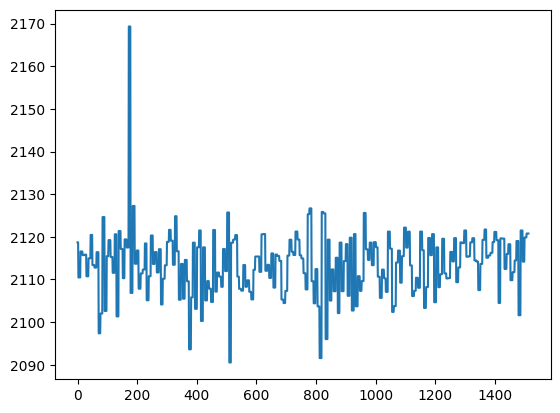

In [11]:
plt.plot(accelerations)